## INTRO DEEP LEARNING

Vamos a tratar de, utilizando deep learning (redes neuronales), definir que numero se encuentra en la imagen (28pixeles x28pixeles).

### First Neural Network

In [44]:
# Importación de librerías
import tensorflow as tf # Es una librería de intelgencia artificial y deep learning
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset de MNIST
mnist = tf.keras.datasets.mnist # Importación del dataset MINST dentro de la libreria tensor flow (keras)
(x_train, y_train), (x_test,y_test) = mnist.load_data() # División del dataset entre conjuntos de entrenamiento y de testeo

# Normalicemos el input
x_train, x_test = x_train / 255.0, x_test / 255.0

In [45]:
len(x_train) # cuantos datos tenemos de entreno

60000

In [46]:
len(x_test) # cuantos datos tenemos de testeo

10000

In [47]:
x_test[0].shape # cual es la forma de la imagen 1 del dataset x_test (muestra los pixeles (es decir, 28x28))

(28, 28)

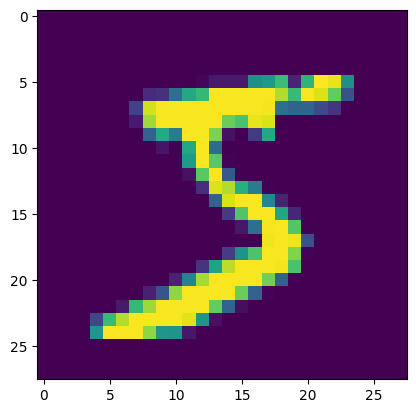

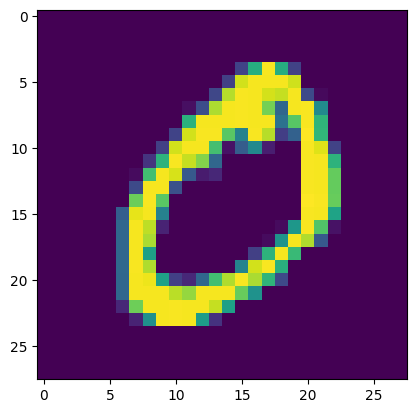

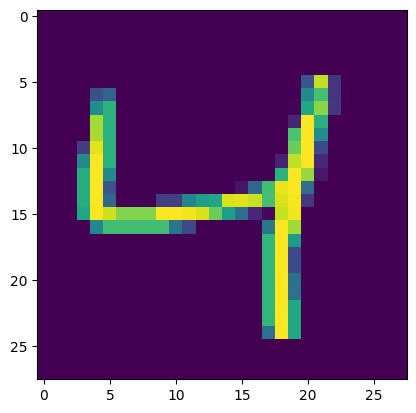

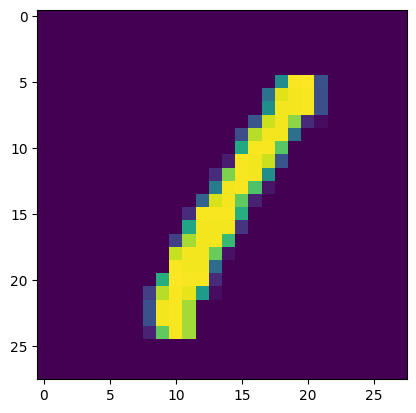

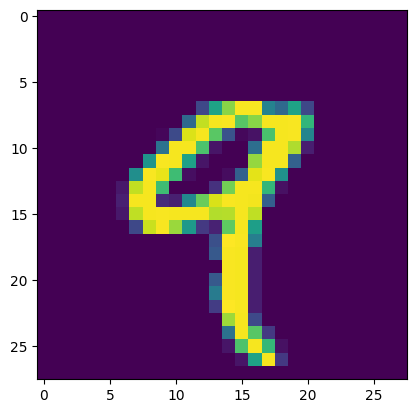

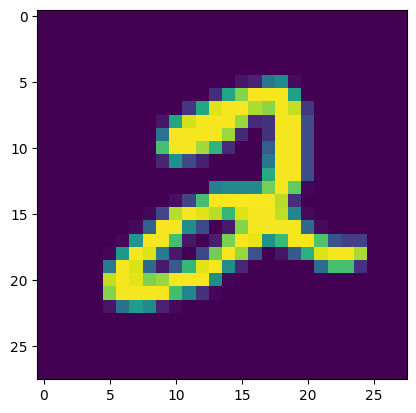

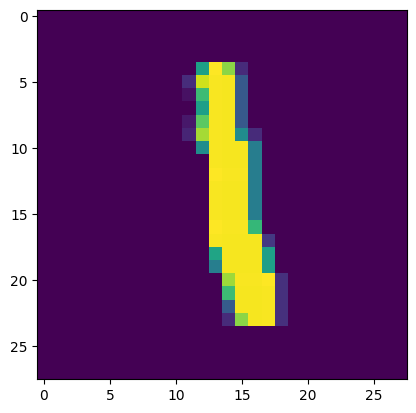

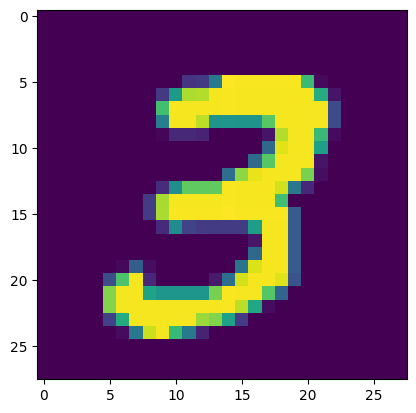

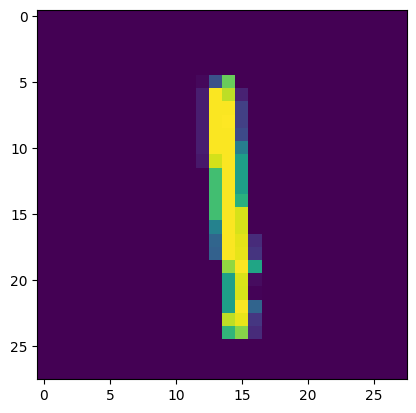

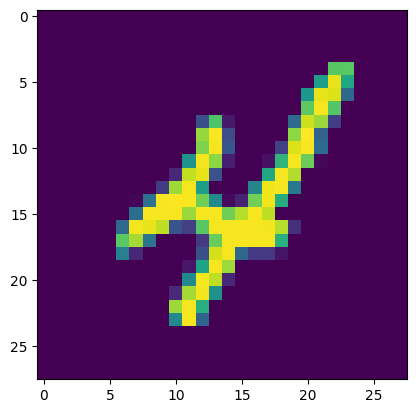

In [48]:
# Ejemplos de imagenes
for i in range(10):
  plt.imshow(x_train[i]) # Vayamos a mostrar la imagen 10 del x_train dataset
  plt.show()

In [42]:
# Definimos la arquitectura del modelo
model = tf.keras.models.Sequential ([ # Modelo secuencial de tipo Red Neuronal Densa
    tf.keras.layers.Flatten(input_shape = (28,28)), # CAPA FLATTEN (de entrada) convierte cada imagen 2D en un vector 1D, 'aplanca' la imagen para que pueda entrar en una red totalmente conectada (densa), hay que facilitar la shape de cada imagen
    tf.keras.layers.Dense(128,activation='relu'), # CAPA DENSE (capa oculta), 128 neuronas y 'relu' usa actiavaciones no lineales.
    tf.keras.layers.Dropout(0.2),  # CAPA DROPOUT, apaga aleatoriamente el 20% de las neuronas durante el entrenamiento, para evitar sobreajuste
    tf.keras.layers.Dense(10,activation='softmax') # CAPA DDE SALIDA, tiene 10 neuroas poque el dataset MNSIT tiene 10 clases (digitos del 0-9). Usa sofrtmaz para convertir als salidas en probabilidades que suman 1.
])

# Compilación del modelo:
# Antes de entranar una red neuronal, debemos 'comploarla', es decirn indicarle:
# - el optimizador (como ajustará los pesos)
# - la función de perdida (que error intentará minimizar)
# - las métrics (que valores queremos monitorizar)
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Entrenamiento del modelo en el dataset
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test)) # epoch, es el número de veces que el modelo verá el conjunto de entrenamiento, el validation_split es el porcentaje de datso que se reserva para la validación


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7140 - loss: 8.7415 - val_accuracy: 0.8833 - val_loss: 0.5140
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8411 - loss: 0.5970 - val_accuracy: 0.9036 - val_loss: 0.4086
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8737 - loss: 0.4764 - val_accuracy: 0.9262 - val_loss: 0.3171
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8930 - loss: 0.4011 - val_accuracy: 0.9332 - val_loss: 0.3090
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8984 - loss: 0.3799 - val_accuracy: 0.9316 - val_loss: 0.3826
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9070 - loss: 0.3559 - val_accuracy: 0.9339 - val_loss: 0.3220
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9096 - loss: 0.3534 - val_accuracy: 0.9405 - val_loss: 0.2748
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9129 - loss: 0.3385 - val_accurac

In [50]:
# Evaluación del modelo con el testeo del dataset
test_loss, test_accuracy = model.evaluate(x_test,y_test)

# Printeamos el test loss y el accuracy
print(f'test_loss:{test_loss},test_accuracy: {test_accuracy}')



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0941 - loss: 2.5326
test_loss:2.5061123371124268,test_accuracy: 0.09740000218153


In [54]:
history.history # se trata de un diccionario donde se recogen cada iteración las distintas métricas

{'accuracy': [0.7646333575248718,
  0.8480499982833862,
  0.876550018787384,
  0.8914499878883362,
  0.8993666768074036,
  0.9049333333969116,
  0.9087499976158142,
  0.910966694355011,
  0.9160833358764648,
  0.9161499738693237],
 'loss': [2.60667085647583,
  0.568122148513794,
  0.47044989466667175,
  0.4130626916885376,
  0.3849417567253113,
  0.3703303635120392,
  0.3535115420818329,
  0.34742653369903564,
  0.33122849464416504,
  0.3303530812263489],
 'val_accuracy': [0.8833000063896179,
  0.9035999774932861,
  0.9261999726295471,
  0.9332000017166138,
  0.9315999746322632,
  0.933899998664856,
  0.940500020980835,
  0.9284999966621399,
  0.9444000124931335,
  0.9474999904632568],
 'val_loss': [0.5140420794487,
  0.408585786819458,
  0.3170713186264038,
  0.30900999903678894,
  0.3826420307159424,
  0.32201263308525085,
  0.2747792601585388,
  0.33949270844459534,
  0.2733460068702698,
  0.28049638867378235]}

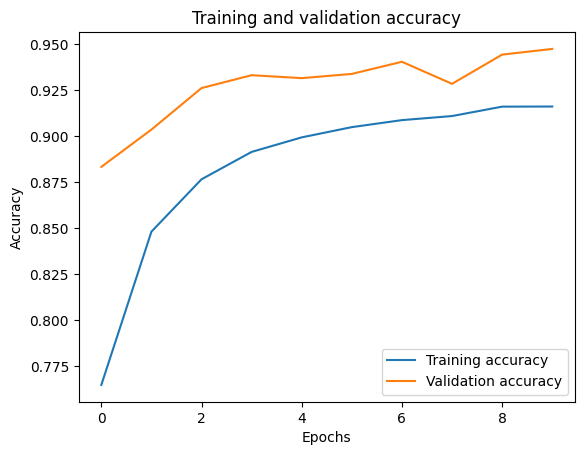

In [51]:
# Visualización de las métricas
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()